# Mushroom with naive bayes classifier

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and
Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ''leafletsthree, let it be'' for Poisonous Oak and Ivy.

 Attribute Information: (classes: edible=e, poisonous=p)
 1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                              knobbed=k,sunken=s

 2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s

 3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                              pink=p,purple=u,red=e,white=w,yellow=y

 4. bruises?:                 bruises=t,no=f

 5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                              musty=m,none=n,pungent=p,spicy=s

 6. gill-attachment:          attached=a,descending=d,free=f,notched=n

 7. gill-spacing:             close=c,crowded=w,distant=d

 8. gill-size:                broad=b,narrow=n

 9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                              green=r,orange=o,pink=p,purple=u,red=e,
                              white=w,yellow=y

10. stalk-shape:              enlarging=e,tapering=t

11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                              rhizomorphs=z,rooted=r,missing=?

12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                              pink=p,red=e,white=w,yellow=y

15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                              pink=p,red=e,white=w,yellow=y

16. veil-type:                partial=p,universal=u

17. veil-color:               brown=n,orange=o,white=w,yellow=y

18. ring-number:              none=n,one=o,two=t

19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                              none=n,pendant=p,sheathing=s,zone=z

20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                              orange=o,purple=u,white=w,yellow=y

21. population:               abundant=a,clustered=c,numerous=n,
                              scattered=s,several=v,solitary=y

22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                              urban=u,waste=w,woods=d
                              
                              
Class Distribution: 
    --    edible: 4208 (51.8%)
    -- poisonous: 3916 (48.2%)
    --     total: 8124 instances



In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [310]:
from scipy.stats import gaussian_kde
from sklearn.model_selection import train_test_split

In [312]:
columns_renamed = ['target',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']
df = pd.read_csv('../datasets/agaricus-lepiota.data', names = columns_renamed)

In [313]:
df.head()

target cap-shape cap-surface cap-color bruises odor gill-attachment  \
0      p         x           s         n       t    p               f   
1      e         x           s         y       t    a               f   
2      e         b           s         w       t    l               f   
3      p         x           y         w       t    p               f   
4      e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

## Data exploration

#### Pass categorical data to numerical for the data exploration

In [314]:
def categorical_to_numerical () :
    for name in df.columns :
        if df[name].dtypes == 'object' :
            uniques = np.unique(df[name].values)
            df[name] = df[name].apply(lambda x : uniques.tolist().index(x))    
categorical_to_numerical()

In [315]:
df.head()

target  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0       1          5            2          4        1     6                1   
1       0          5            2          9        1     0                1   
2       0          0            2          8        1     3                1   
3       1          5            3          8        1     6                1   
4       0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [215]:
df.describe()

target    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.482029     3.348104     1.827671     4.504677     0.415559   
std       0.499708     1.604329     1.229873     2.545821     0.492848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     0.000000     3.000000     0.000000   
50%       0.000000     3.000000     2.000000     4.000000     0.000000   
75%       1.000000     5.000000     3.000000     8.000000     1.000000   
max       1.000000     5.000000     3.000000     9.000000     1.000000   

              odor  gill-attachment  gill-spacing    gill-size   gill-color  \
count  8124.000000      8124.000000   8124.000000  8124.000000  8124.000000   
mean      4.144756         0.974151      0.161497     0.309207     4.810684   
std       2.103729         0.158695      0.368011     0.462195     3.540359   
min       0.000000         0.000000      0.000000     0.000000     0.000000   
25%       2.000000         1.000000      0.000000     0.000000     2.000000   
50%       5.000000         1.000000      0.000000     0.000000     5.000000   
75%       5.000000         1.000000      0.000000     1.000000     7.000000   
max       8.000000         1.000000      1.000000     1.000000    11.000000   

       ...  stalk-surface-below-ring  stalk-color-above-ring  \
count  ...               8124.000000             8124.000000   
mean   ...                  1.603644                5.816347   
std    ...                  0.675974                1.901747   
min    ...                  0.000000                0.000000   
25%    ...                  1.000000                6.000000   
50%    ...                  2.000000                7.000000   
75%    ...                  2.000000                7.000000   
max    ...                  3.000000                8.000000   

       stalk-color-below-ring  veil-type   veil-color  ring-number  \
count             8124.000000     8124.0  8124.000000  8124.000000   
mean                 5.794682        0.0     1.965534     1.069424   
std                  1.907291        0.0     0.242669     0.271064   
min                  0.000000        0.0     0.000000     0.000000   
25%                  6.000000        0.0     2.000000     1.000000   
50%                  7.000000        0.0     2.000000     1.000000   
75%                  7.000000        0.0     2.000000     1.000000   
max                  8.000000        0.0     3.000000     2.000000   

         ring-type  spore-print-color   population      habitat  
count  8124.000000        8124.000000  8124.000000  8124.000000  
mean      2.291974           3.596750     3.644018     1.508616  
std       1.801672           2.382663     1.252082     1.719975  
min       0.000000           0.000000     0.000000     0.000000  
25%       0.000000           2.000000     3.000000     0.000000  
50%       2.000000           3.000000     4.000000     1.000000  
75%       4.000000           7.000000     4.000000     2.000000  
max       4.000000           8.000000     5.000000     6.000000  

[8 rows x 23 columns]

#### Plots

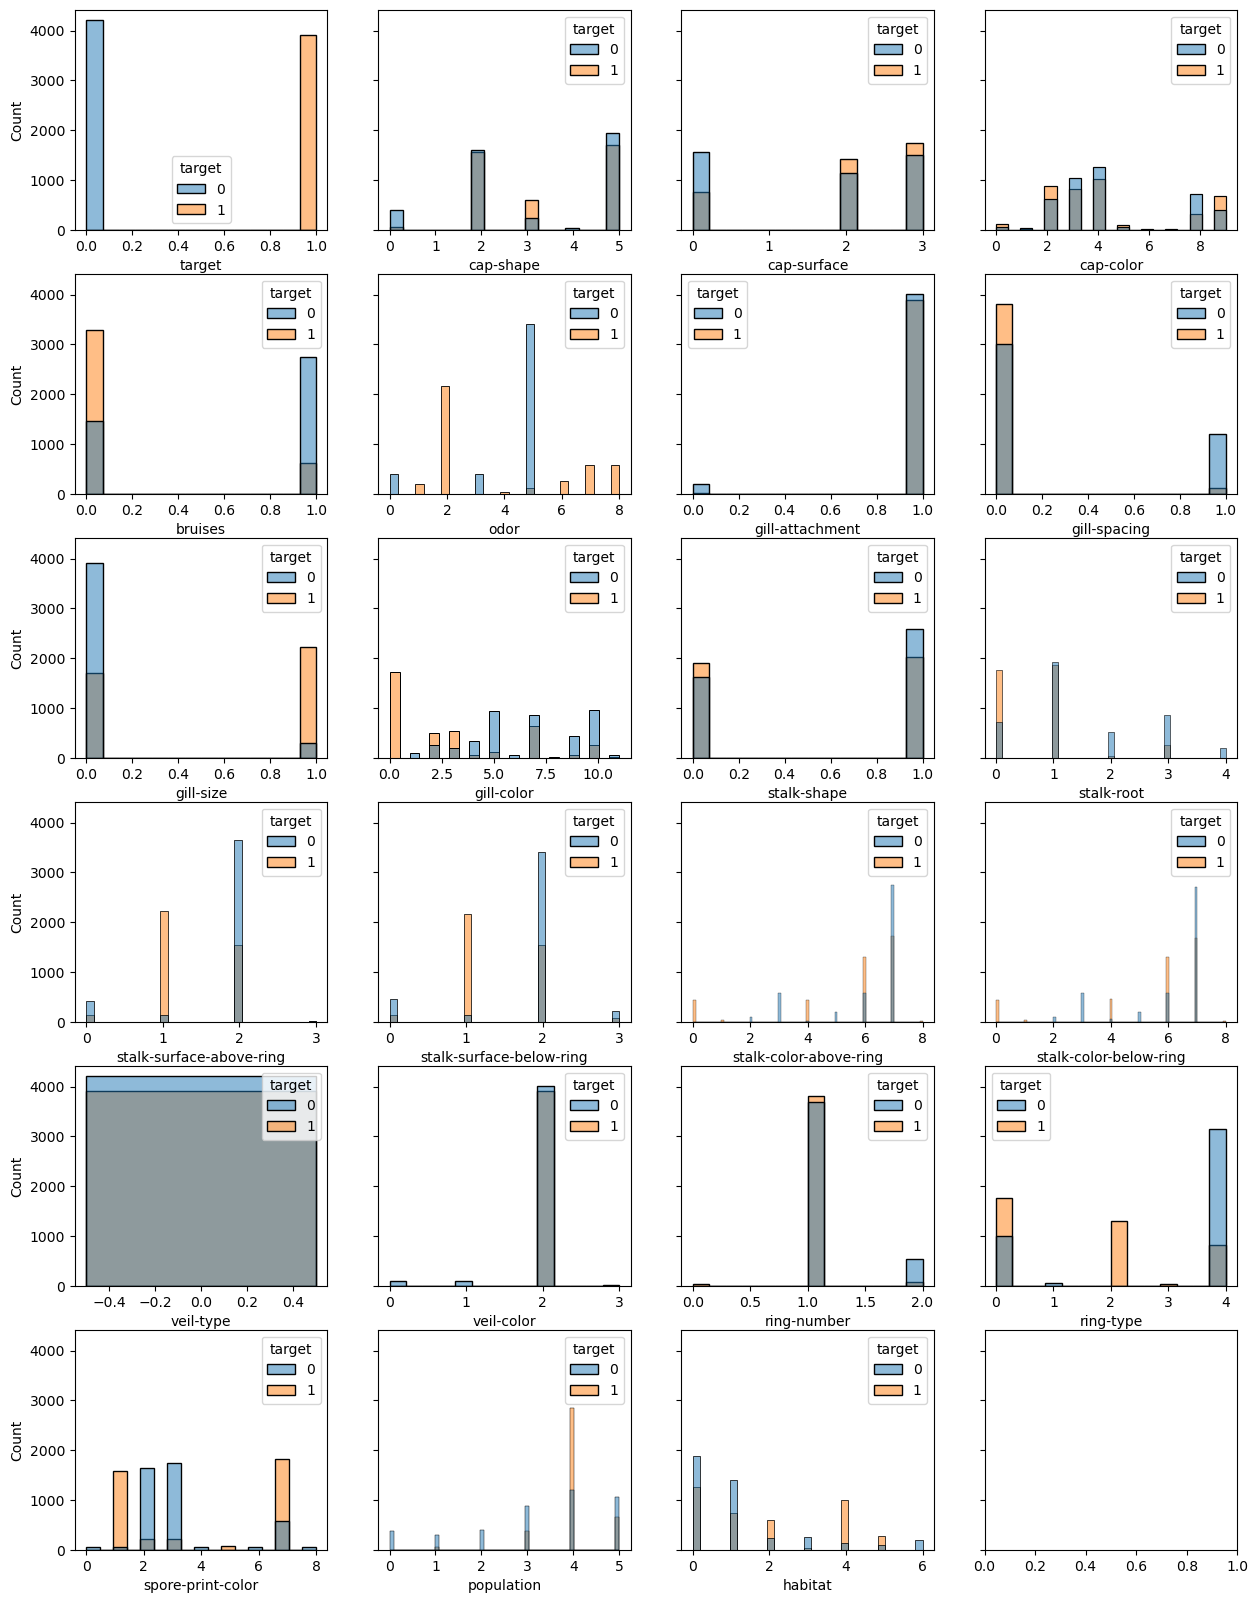

In [216]:
fig, axs = plt.subplots(6,4, figsize = (15, 20), sharey = True)
atr = list(df.columns)
for name, ax in zip(atr,axs.flatten()) :
    sns.histplot(ax = ax, data=df, x = name, hue = 'target')

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   target                    8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

In [259]:
df.corr()

target  cap-shape  cap-surface  cap-color  \
target                    1.000000   0.052951     0.178446  -0.031384   
cap-shape                 0.052951   1.000000    -0.050454  -0.048203   
cap-surface               0.178446  -0.050454     1.000000  -0.019402   
cap-color                -0.031384  -0.048203    -0.019402   1.000000   
bruises                  -0.501530  -0.035374     0.070228  -0.000764   
odor                     -0.093552  -0.021935     0.045233  -0.387121   
gill-attachment           0.129200   0.078865    -0.034180   0.041436   
gill-spacing             -0.348387   0.013196    -0.282306   0.144259   
gill-size                 0.540024   0.054050     0.208100  -0.169464   
gill-color               -0.530566  -0.006039    -0.161017   0.084659   
stalk-shape              -0.102019   0.063794    -0.014123  -0.456496   
stalk-root               -0.379361   0.030191    -0.126245   0.321274   
stalk-surface-above-ring -0.334593  -0.030417     0.089090  -0.060837   
stalk-surface-below-ring -0.298801  -0.032591     0.107965  -0.047710   
stalk-color-above-ring   -0.154003  -0.031659     0.066050   0.002364   
stalk-color-below-ring   -0.146730  -0.030390     0.068885   0.008057   
veil-type                      NaN        NaN          NaN        NaN   
veil-color                0.145142   0.072560    -0.016603   0.036130   
ring-number              -0.214366  -0.106534    -0.026147  -0.005822   
ring-type                -0.411771  -0.025457    -0.106407   0.162513   
spore-print-color         0.171961  -0.073416     0.230364  -0.293523   
population                0.298686   0.063413     0.021555  -0.144770   
habitat                   0.217179  -0.042221     0.163887   0.033925   

                           bruises      odor  gill-attachment  gill-spacing  \
target                   -0.501530 -0.093552         0.129200     -0.348387   
cap-shape                -0.035374 -0.021935         0.078865      0.013196   
cap-surface               0.070228  0.045233        -0.034180     -0.282306   
cap-color                -0.000764 -0.387121         0.041436      0.144259   
bruises                   1.000000 -0.061825         0.137359     -0.299473   
odor                     -0.061825  1.000000        -0.059590      0.063936   
gill-attachment           0.137359 -0.059590         1.000000      0.071489   
gill-spacing             -0.299473  0.063936         0.071489      1.000000   
gill-size                -0.369596  0.310495         0.108984     -0.108333   
gill-color                0.527120 -0.129213        -0.128567      0.100193   
stalk-shape               0.099364  0.459766         0.186485      0.080895   
stalk-root                0.244188 -0.205215         0.144063      0.350548   
stalk-surface-above-ring  0.460824  0.118617        -0.088916     -0.212359   
stalk-surface-below-ring  0.458983  0.061820        -0.116177     -0.213775   
stalk-color-above-ring    0.083538  0.174532         0.099299      0.274574   
stalk-color-below-ring    0.092874  0.169407         0.097160      0.253505   
veil-type                      NaN       NaN              NaN           NaN   
veil-color                0.119770 -0.057747         0.897518      0.073363   
ring-number               0.056788  0.111905         0.093236      0.243014   
ring-type                 0.692973 -0.281387        -0.146689     -0.195897   
spore-print-color        -0.285008  0.469055        -0.029524      0.047323   
population                0.088137 -0.043623         0.165575     -0.529253   
habitat                  -0.075095 -0.026610        -0.030304     -0.154680   

                          gill-size  gill-color  ...  \
target                     0.540024   -0.530566  ...   
cap-shape                  0.054050   -0.006039  ...   
cap-surface                0.208100   -0.161017  ...   
cap-color                 -0.169464    0.084659  ...   
bruises                   -0.369596    0.527120  ...   
odor                       0.310495   -0.1

If we look, we can see the veil-type column gives as result Nan, this is because when we apply the function categorical_to_numerical all the values of that column are zeros, then when we apply the df.corr to see if any column can cause the error "singular matrix error" precisely this can lead us to the error. Then the most convenient thing would be to delete it.

## Model

#### Train/Test split

In [251]:
X = df.iloc[:, 1:].drop(['veil-type'], axis=1)
y = df[['target']]

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

#### Likelihood estimation

In [258]:
lkhDict = {column : {
    'likelihood_0' : gaussian_kde(X_train[column].loc[y_train.target == True], bw_method = 'scott'),
    'likelihood_1' : gaussian_kde(X_train[column].loc[y_train.target == False], bw_method = 'scott')
} for column in X}

#### Prior

In [261]:
prior_0, prior_1 = y_train.target.value_counts(normalize = True)
(prior_0, prior_1)

(0.5163871364825358, 0.48361286351746424)

#### Estimation

In [303]:
def evaluate_posterior (row) :
    post_0, post_1 = prior_0, prior_1
    for lkh in lkhDict :
        post_0 *= lkhDict[lkh]['likelihood_0'].evaluate(row[lkh])[0]
        post_1 *= lkhDict[lkh]['likelihood_1'].evaluate(row[lkh])[0]
    
    return 0 if post_0 < post_1 else 1

In [306]:
result = pd.DataFrame()
result['target'] = y_test
result['pred'] = X_test.apply(evaluate_posterior, axis = 1)

In [307]:
result.head()

target  pred
4061       0     0
7739       1     1
7944       0     0
2952       0     0
7619       1     1

In [296]:
result.groupby('target').pred.value_counts(normalize = True)

target  pred 
0       True     0.956573
        False    0.043427
1       False    0.974127
        True     0.025873
Name: pred, dtype: float64

In [317]:
np.sum(result.pred==result.target)/y_test.shape[0]

0.9649230769230769

In view of the results, we can say that our model is quite good with a 0.96% accuracy rate.